# Ensemble Vote Classifier

Agora que desenvolvemos alguns modelos relativamente eficazes vamos tentar combinar as suas previsões de modo a obtermos um modelo ainda mais eficaz!

Em primeiro, analisamos a precisão de cada um dos modelos desenvolvidos.

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


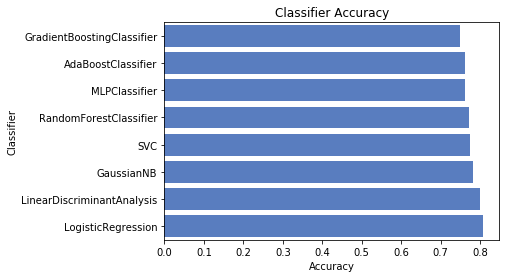

In [2]:
from sklearn.datasets import load_iris
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from copy import deepcopy
from random import randint
from itertools import combinations 
from imblearn.over_sampling import SMOTE

X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

#sm = SMOTE(random_state=62)
#X_train, y_train = sm.fit_resample(X_train, y_train )

'''
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']

'''

pipe_nb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
pipe_rf = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=5, oob_score=False))
pipe_lr = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=1, dual=True, fit_intercept=True, intercept_scaling=10, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.0001))
pipe_ab = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=100))
pipe_gb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=None, max_features=None, min_impurity_decrease=1e-5, min_samples_split=4))
pipe_ld = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
pipe_ml = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(activation='tanh', alpha=0.0001, learning_rate_init=0.01, max_iter=100, solver='lbfgs', hidden_layer_sizes=(8,4)))
pipe_sv = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), SVC(C=10, decision_function_shape='ovr', gamma='scale', kernel='rbf', probability=True, shrinking=True, tol=0.0001))

clfs= [ pipe_nb, pipe_rf, pipe_lr, pipe_ab, pipe_gb, pipe_ld, pipe_ml, pipe_sv]


dict = {}
for c in clfs:
    c.fit(X_train, y_train)
    dict[c[1].__class__.__name__] = accuracy_score(y_test,c.predict(X_test))

log_cols = ["Classifier", "Accuracy"]
    
log 	 = pd.DataFrame(columns=log_cols)
    
for clf in dict:
	dict[clf] = dict[clf] 
	log_entry = pd.DataFrame([[clf, dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

log = log.sort_values(by=['Accuracy'])
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Agora, analisamos a eficácia da junção dos modelos.

In [22]:
X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

#sm = SMOTE(random_state=62)
#X_train, y_train = sm.fit_resample(X_train, y_train )

'''
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']

'''

pipe_nb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
pipe_rf = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=5, oob_score=False))
pipe_lr = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=1, dual=True, fit_intercept=True, intercept_scaling=10, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.0001))
pipe_ab = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=100))
pipe_gb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=None, max_features=None, min_impurity_decrease=1e-5, min_samples_split=4))
pipe_ld = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
pipe_ml = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(activation='tanh', alpha=0.0001, learning_rate_init=0.01, max_iter=100, solver='lbfgs', hidden_layer_sizes=(8,4)))
pipe_sv = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), SVC(C=10, decision_function_shape='ovr', gamma='scale', kernel='rbf', probability=True, shrinking=True, tol=0.0001))

clfs= [ pipe_nb, pipe_rf, pipe_lr, pipe_ab, pipe_gb, pipe_ld, pipe_ml]
'''

maxx = 0
for i in range(1, len(clfs) + 1):
    print(i)
    for c in combinations(clfs, i):
        eclf = EnsembleVoteClassifier(clfs=deepcopy(c))

        eclf.fit(X_train,y_train)
        predictions = eclf.predict(X_test)
        
        if balanced_accuracy_score(y_test,predictions) >= maxx:
            maxx = balanced_accuracy_score(y_test,predictions)
            best = c

'''

eclf = EnsembleVoteClassifier(clfs=clfs)


eclf.fit(X_train,y_train)



predictions = eclf.predict(X_test)
'''
for x in best:
    print(x[1].__class__.__name__, end=', ')
print('')
'''
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print('Accuracy: ' + str(accuracy_score(y_test,predictions)*100) + '%')

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.83      0.96      0.89       196

    accuracy                           0.80       240
   macro avg       0.59      0.53      0.52       240
weighted avg       0.74      0.80      0.75       240

[[  4  40]
 [  7 189]]
Accuracy: 80.41666666666667%


/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Podemos agora guardar as previsões efetuadas num ficheiro .csv.

In [19]:
test_rows = pd.read_csv('problem_info/test_data.csv')
data = {'ID': test_rows['ID'], 'Absent' : [int(x) for x in predictions]}
data = pd.DataFrame(data)
data.to_csv('submit.csv', index=False)

Abaixo encontra-se uma implementação de um modelo de previsão em ensemble binário em que podemos fazer variar o peso das previsões feitas para diferente classes. Os resultados obtidos com o mesmo, no entanto, não compensam a sua adoção.

In [20]:
X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

pipe_nb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
pipe_rf = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=5, oob_score=False))
pipe_lr = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=1, dual=True, fit_intercept=True, intercept_scaling=10, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.0001))
pipe_ab = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=100))
pipe_gb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=None, max_features=None, min_impurity_decrease=1e-5, min_samples_split=4))
pipe_ld = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
pipe_ml = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(activation='tanh', alpha=0.0001, learning_rate_init=0.01, max_iter=100, solver='lbfgs', hidden_layer_sizes=(8,4)))
pipe_sv = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), SVC(C=10, decision_function_shape='ovr', gamma='scale', kernel='rbf', probability=True, shrinking=True, tol=0.0001))

clfs= [ pipe_nb, pipe_rf, pipe_lr, pipe_ab, pipe_gb, pipe_ld, pipe_ml]


prediction_weight = 1
lpredictions = []

for c in clfs:
    c.fit(X_train, y_train)
    lpredictions.append(c.predict(X_test))

predictions = []
for i in range(0, X_test.shape[0]):
    p = 0
    for l in lpredictions:
        p += l[i]*prediction_weight
    p /= float(len(lpredictions))
    if p > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)


print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.24      0.09      0.13        44
           1       0.82      0.93      0.87       196

    accuracy                           0.78       240
   macro avg       0.53      0.51      0.50       240
weighted avg       0.71      0.78      0.74       240

[[  4  40]
 [ 13 183]]
0.7791666666666667


/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
